In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
combine = [df_train, df_train]

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df_train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [6]:
x = lambda a : a['Name'].split(",")[1].split()[0]
df_train['Title'] = df_train.apply(x, axis=1)
df_test['Title'] = df_test.apply(x, axis=1)

In [7]:
df_train['Title'].describe()

count     891
unique     17
top       Mr.
freq      517
Name: Title, dtype: object

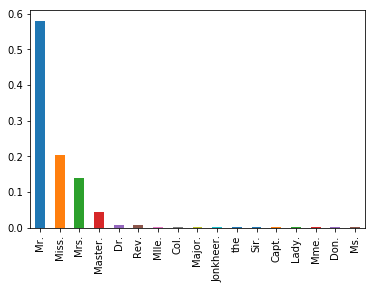

In [8]:
df_train.Title.value_counts(normalize=True).plot(kind='bar')


In [9]:
Title_Dictionary = {
        "Capt.":       "Officer",
        "Col.":        "Officer",
        "Major.":      "Officer",
        "Dr.":         "Officer",
        "Rev.":        "Officer",
        "Jonkheer.":   "Royalty",
        "Don.":        "Royalty",
        "Sir." :       "Royalty",
        "the":"Royalty",
        "Dona.":       "Royalty",
        "Lady." :      "Royalty",
        "Mme.":        "Mrs",
        "Ms.":         "Mrs",
        "Mrs." :       "Mrs",
        "Mlle.":       "Miss",
        "Miss." :      "Miss",
        "Mr." :        "Mr",
        "Master." :    "Master"
}
df_train['Title'] = df_train.Title.map(Title_Dictionary)
df_test['Title'] = df_test.Title.map(Title_Dictionary)

In [10]:
df_train['Name'][pd.isna(df_train['Title'])]

Series([], Name: Name, dtype: object)

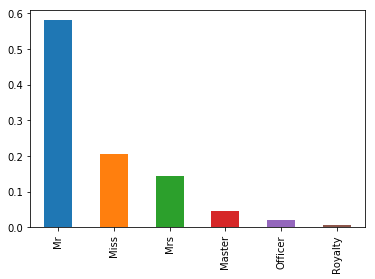

In [11]:
df_train.Title.value_counts(normalize=True).plot(kind='bar')

In [12]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [13]:
df_train.groupby("Title")["Survived"].mean()

Title
Master     0.575000
Miss       0.701087
Mr         0.156673
Mrs        0.795276
Officer    0.277778
Royalty    0.600000
Name: Survived, dtype: float64

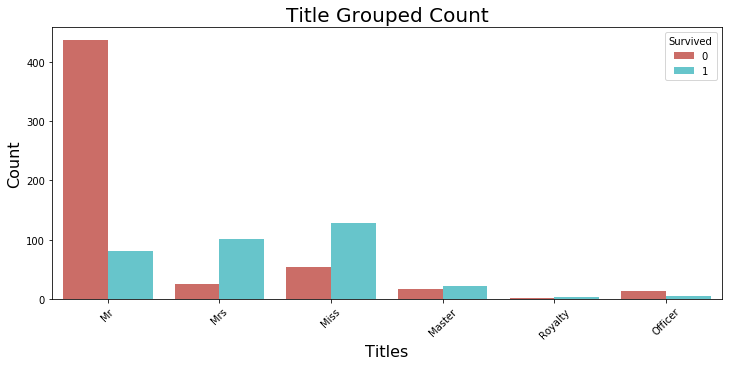

In [21]:
plt.figure(figsize=(12,5))

#Plotting the count of title by Survived or not category
sns.countplot(x='Title', data=df_train, palette="hls",
              hue="Survived")
plt.xlabel("Titles", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Title Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [26]:
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','Title']).Age.transform('median')
df_test.loc[df_test.Age.isnull(), 'Age'] = df_test.groupby(['Sex','Pclass','Title']).Age.transform('median')

In [29]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [37]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [36]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test.groupby(['Sex','Pclass','Title']).Fare.transform('median')


In [38]:
df_test['Fare'].fillna(df_test['Fare'].mean())

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
5        9.2250
6        7.6292
7       29.0000
8        7.2292
9       24.1500
10       7.8958
11      26.0000
12      82.2667
13      26.0000
14      61.1750
15      27.7208
16      12.3500
17       7.2250
18       7.9250
19       7.2250
20      59.4000
21       3.1708
22      31.6833
23      61.3792
24     262.3750
25      14.5000
26      61.9792
27       7.2250
28      30.5000
29      21.6792
         ...   
388      7.7500
389     21.0750
390     93.5000
391     39.4000
392     20.2500
393     10.5000
394     22.0250
395     60.0000
396      7.2500
397     79.2000
398      7.7750
399      7.7333
400    164.8667
401     21.0000
402     59.4000
403     47.1000
404     27.7208
405     13.8625
406     10.5000
407    211.5000
408      7.7208
409     13.7750
410      7.7500
411     90.0000
412      7.7750
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418,

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64